In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("quikr_car.csv")
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:
data.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [5]:
data.shape

(892, 6)

In [6]:
#for back up 
backup=data.copy()

In [7]:
#check for string in years and store only numeric values
data=data[data['year'].str.isnumeric()]


In [8]:
#convert to integer

data['year']=data['year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


C:\Users\athar\AppData\Local\Temp\ipykernel_35760\2386036720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data['year'].astype(int)


In [9]:
## data['Price']!='Ask For Price' creates a boolean mask (a series of True/False values)
## Applying this mask to data (data[...]) creates a new DataFrame with only the rows that pass the condition

#masking 

data=data[data['Price']!='Ask For Price']
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel


In [10]:
#remove commas from prices and change its type 

data['Price']=data['Price'].str.replace(',','').astype(int)


In [11]:
#to remove kms from last  
data['kms_driven']=data['kms_driven'].str.split().str.get(0)

In [12]:
#to remove commas
data['kms_driven']=data['kms_driven'].str.replace(",",'')

In [13]:
#data['kms_driven'].str.isnumeric() -> GIVES TRUE OF FALSE
# data[[]] -> keeps only true values
data=data[data['kms_driven'].str.isnumeric()]

In [14]:
#to convert to int
data['kms_driven']=data['kms_driven'].astype(int)

In [15]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [17]:
#data=data.dropna(subset=['fuel_type'])
data=data[~data['fuel_type'].isna()]

In [18]:
data.shape

(816, 6)

In [19]:
#split then slice and then join to reduce the size of the name 
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

C:\Users\athar\AppData\Local\Temp\ipykernel_35760\1695885967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')


In [20]:
#row index fixing after cleaning and deletion 
data=data.reset_index(drop=True)
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [21]:
data.to_csv("Cleaned_Car_data.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [23]:
data.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [24]:
#row index fixing after cleaning and deletion 
data=data.reset_index(drop=True)
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [25]:
data['company'].unique()


array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

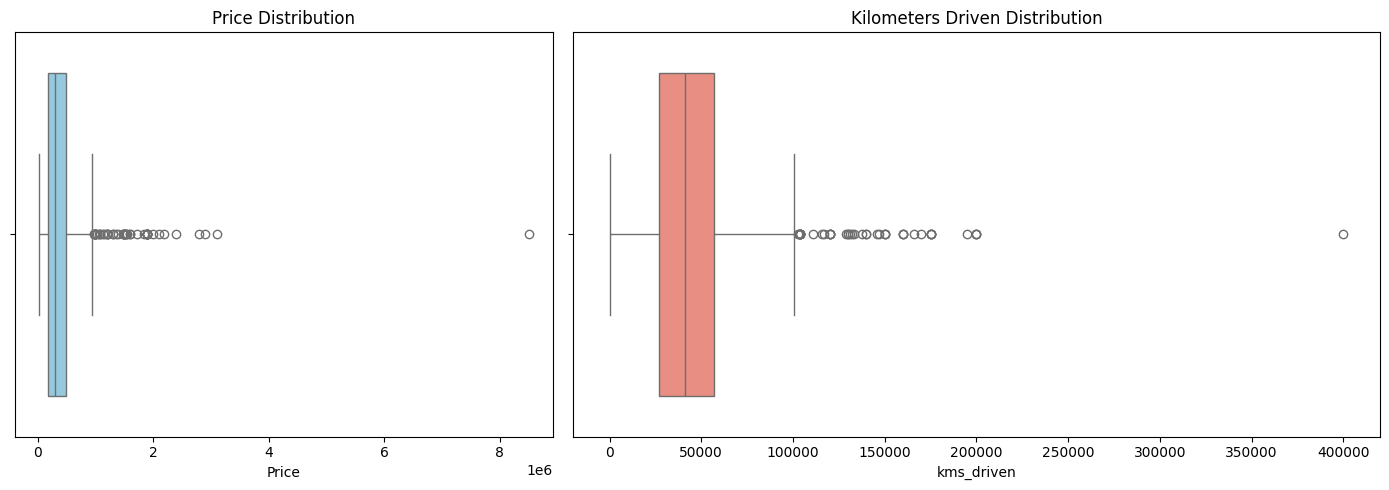

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), gridspec_kw={'width_ratios': [1, 1.5]})

# Boxplot for 'Price'
sns.boxplot(x=data['Price'], ax=axes[0], color='skyblue')
axes[0].set_title("Price Distribution")

# Boxplot for 'kms_driven' with larger width
sns.boxplot(x=data['kms_driven'], ax=axes[1], color='salmon')
axes[1].set_title("Kilometers Driven Distribution")

# Improve layout spacing
plt.tight_layout()
plt.show()


In [27]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
data = remove_outliers_iqr(data, 'kms_driven')



C:\Users\athar\AppData\Local\Temp\ipykernel_35760\4035560531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(x='company',y='Price',data=data,palette='rainbow')


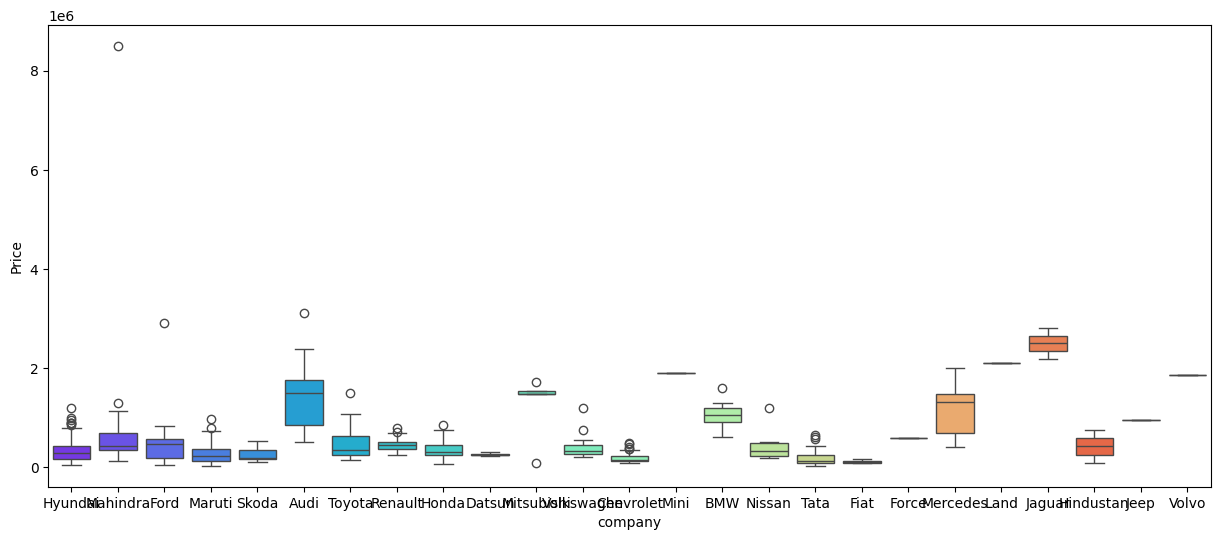

In [28]:
import seaborn as sns

plt.subplots(figsize=(15,6))
ax=sns.boxplot(x='company',y='Price',data=data,palette='rainbow')

plt.show()

<Axes: xlabel='year', ylabel='Price'>

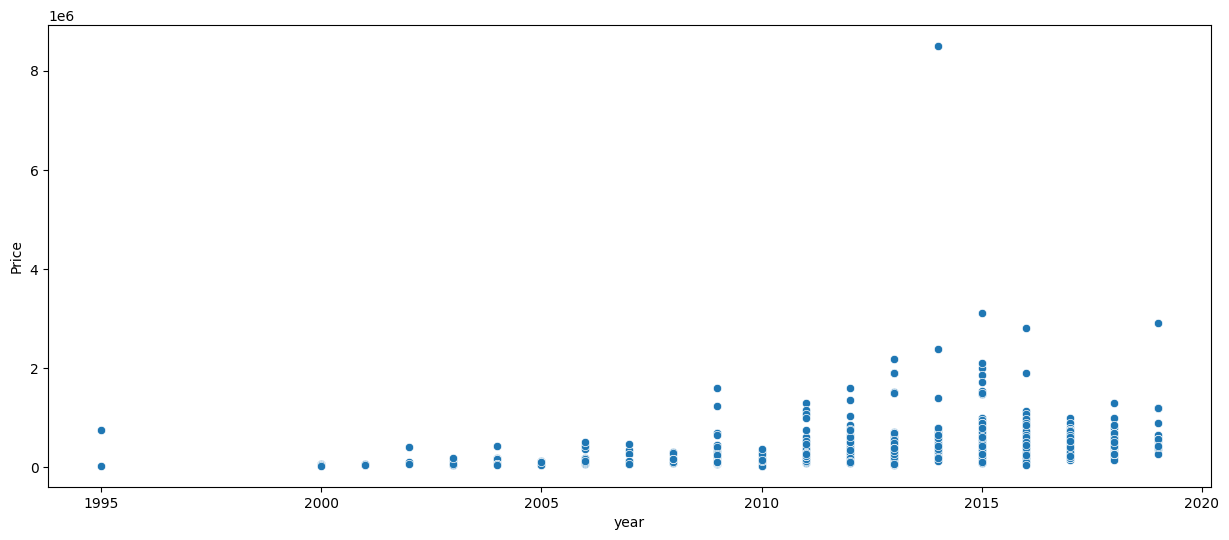

In [29]:
plt.subplots(figsize=(15,6))
sns.scatterplot(x='year',y='Price',data=data)

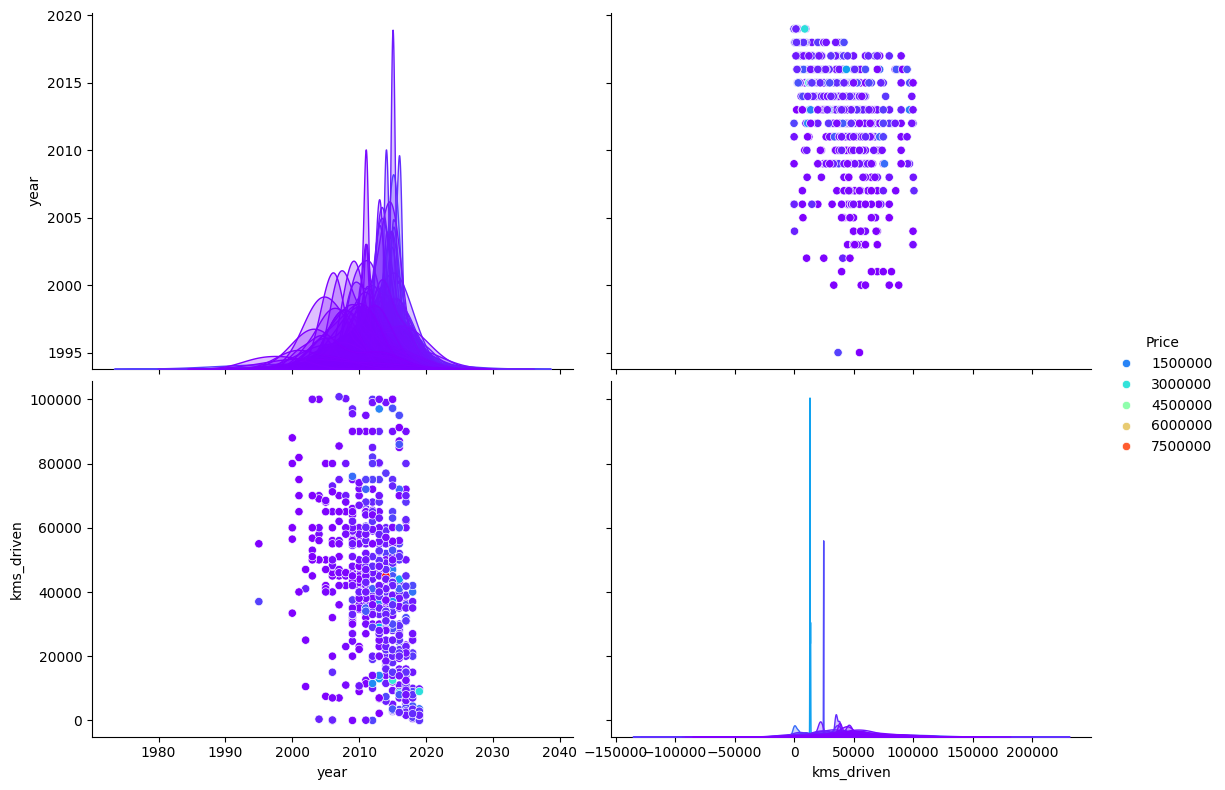

In [30]:

sns.pairplot(data,hue='Price',palette='rainbow',height=4,aspect=1.4)

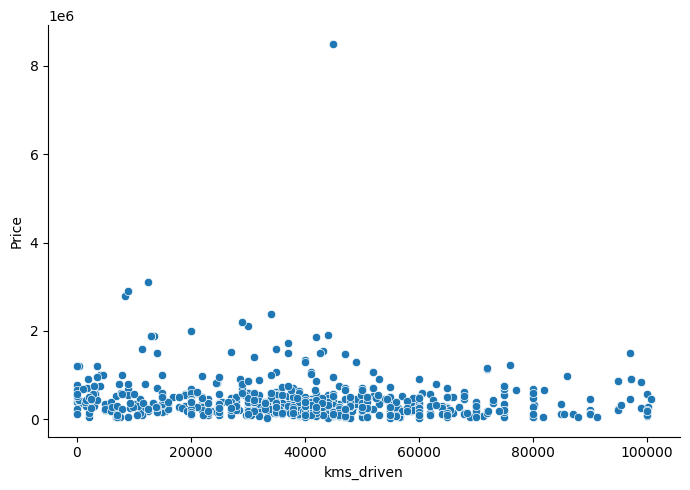

In [31]:
sns.relplot(x='kms_driven',y='Price',data=data,height=5,aspect=1.4)


<Axes: xlabel='fuel_type', ylabel='Price'>

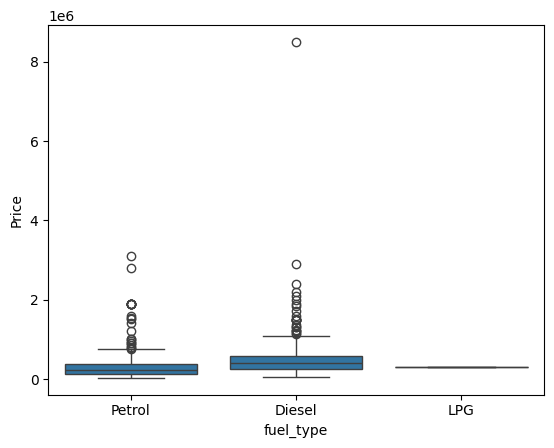

In [32]:

sns.boxplot(x='fuel_type',y='Price',data=data)

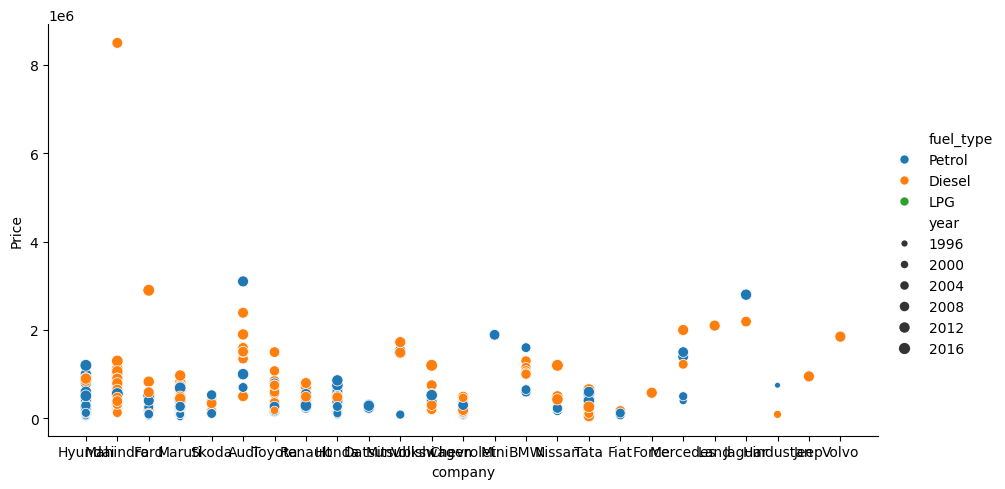

In [33]:
sns.relplot(x='company',y='Price',hue='fuel_type',data=data,size='year',height=5,aspect=1.8)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
X=data[['name','company','year','kms_driven','fuel_type']]
X


,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Skoda Fabia,Skoda,2009,45000,Petrol
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
814,Tata Zest XM,Tata,2018,27000,Diesel


In [36]:
#pd.get_dummies(data[['company','name','fuel_type']]).astype(int)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler ,OneHotEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [38]:

X=data[['name','company','year',"kms_driven",'fuel_type']]
Y=data["Price"]
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2)
X
Y

ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])


OneHotEncoder()

In [39]:


column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    (StandardScaler(),['year','kms_driven']),remainder='passthrough')

In [40]:
lr=LinearRegression()
xg= XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=8,random_state=42)

In [41]:
pipe=make_pipeline(column_trans,lr)
pipe_xg=make_pipeline(column_trans,xg)

In [42]:
pipe.fit(X_train,Y_train)
pipe_xg.fit(X_train,Y_train)

y_pred=pipe.predict(x_test)
y_pred_xg=pipe_xg.predict(x_test)

In [43]:
r2_score(y_test,y_pred)

0.17706735254637407

In [44]:
mean_absolute_error(y_test,y_pred)

136912.9969716947

In [45]:
scores=[]
scores_xg=[]

for i in range(1000):
    #USED LINEAR REGRESSION 
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    
    #USING XGBOOST TO FIND THE BEST STATE GIVINF THE MOST ACCURACY
    xg= XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=7,random_state=i)
    pipe_xg=make_pipeline(column_trans,xg)
    pipe_xg.fit(X_train,y_train)
    scores_xg.append(r2_score(y_test,y_pred))



In [46]:
#Linear Regression Score 

In [47]:
np.argmax(scores)

np.int64(243)

In [48]:
#XGBOOST R2_SCORE

In [49]:
np.argmax(scores_xg)

np.int64(243)

In [50]:
#Linear Regression Score 

In [51]:
scores[np.argmax(scores)]

0.900126430568999

In [52]:
#XGBOOST R2_SCORE PERC

In [53]:
scores_xg[np.argmax(scores_xg)]


0.900126430568999

In [54]:

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=np.argmax(scores))

lr=LinearRegression()

pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)

y_pred_l=pipe.predict(X_test)
r2_score(y_test,y_pred_l)


0.900126430568999

In [55]:
mean_absolute_error(y_test,y_pred)

352810.47327118134

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=np.argmax(scores_xg))
xg= XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=7,random_state=np.argmax(scores_xg))

pipe_xg=make_pipeline(column_trans,xg)
pipe_xg.fit(X_train,y_train)
y_pred_xg=pipe_xg.predict(X_test)
r2_score(y_test,y_pred_xg)

0.915003776550293

In [57]:
mean_absolute_error(y_test,y_pred_xg)

70161.15625

In [58]:
# pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Honda City','Honda',2024,1089,'Diesel']).reshape(1,5)))

array([765908.27122414])

In [59]:
#Predicted Using XGboost Regressor 

In [60]:
pipe_xg.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Tata Zest XM','Tata', 2023, 189,'Diesel']).reshape(1,5)))

array([513929.4], dtype=float32)

In [61]:
import pickle

In [64]:
pickle.dump(pipe_xg,open("XG_boostModel.pkl","wb"))